# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('DOS newest.csv')


In [3]:
dataset = pd.DataFrame(dataset)

In [4]:
dataset.dtypes

Unnamed: 0                    int64
logged_in                     int64
count                         int64
serror_rate                 float64
srv_serror_rate             float64
same_srv_rate               float64
dst_host_count                int64
dst_host_srv_count            int64
dst_host_same_srv_rate      float64
dst_host_serror_rate        float64
dst_host_srv_serror_rate    float64
service_http                  int64
flag_S0                       int64
flag_SF                       int64
label                         int64
dtype: object

In [5]:
dataset.head(10)

,Unnamed: 0,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,flag_S0,flag_SF,label
0,0,0,2,0.0,0.0,1.00,150,25,0.17,0.00,0.00,0,0,1,0
1,1,0,13,0.0,0.0,0.08,255,1,0.00,0.00,0.00,0,0,1,0
2,2,0,123,1.0,1.0,0.05,255,26,0.10,1.00,1.00,0,1,0,1
3,3,1,5,0.2,0.2,1.00,30,255,1.00,0.03,0.01,1,0,1,0
4,4,1,30,0.0,0.0,1.00,255,255,1.00,0.00,0.00,1,0,1,0
5,5,0,121,0.0,0.0,0.16,255,19,0.07,0.00,0.00,0,0,0,1
6,6,0,166,1.0,1.0,0.05,255,9,0.04,1.00,1.00,0,1,0,1
7,7,0,117,1.0,1.0,0.14,255,15,0.06,1.00,1.00,0,1,0,1
8,8,0,270,1.0,1.0,0.09,255,23,0.09,1.00,1.00,0,1,0,1
9,9,0,133,1.0,1.0,0.06,255,13,0.05,1.00,1.00,0,1,0,1


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0, splitter='random')

## Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16521   246]
 [  194 10889]]


0.9842010771992818

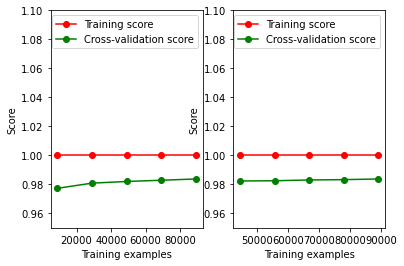

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.95, 1.1), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")

    return plt

fig, (ax1, ax2) = plt.subplots(1, 2)

data = dataset 
#get the data

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = classifier
plot_learning_curve(estimator, X, y, ax = ax1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))

plt.show()

In [15]:
# validation curve
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

np.random.seed(0)

indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),cv=10)


In [23]:
train_scores = train_scores.reshape(train_scores.size,1)

In [24]:
valid_scores = valid_scores.reshape([valid_scores.size,1])

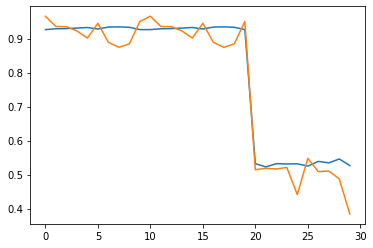

In [27]:
plt.plot(train_scores)
plt.plot(valid_scores)

In [21]:
train_scores.size

30